In [3]:
import sys
!{sys.executable} -m pip install folium


  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)

   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



🧱 Step 1: Import Libraries and Load Dataset

In [4]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

print("📁 Current Working Directory:", os.getcwd())

# Load dataset
df = pd.read_csv("Dataset.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


📁 Current Working Directory: c:\Users\Jiya\Level2_Task3
✅ Dataset Loaded Successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


🧹 Step 2: Data Cleaning

In [6]:
# Keep only necessary columns
df = df[['Restaurant Name', 'City', 'Latitude', 'Longitude', 'Aggregate rating', 'Votes']]

# Drop missing or invalid coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Convert types if needed
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

print(f"✅ Cleaned Dataset — {df.shape[0]} records remain.")
df.head()


✅ Cleaned Dataset — 9551 records remain.


,Restaurant Name,City,Latitude,Longitude,Aggregate rating,Votes
0,Le Petit Souffle,Makati City,14.565443,121.027535,4.8,314
1,Izakaya Kikufuji,Makati City,14.553708,121.014101,4.5,591
2,Heat - Edsa Shangri-La,Mandaluyong City,14.581404,121.056831,4.4,270
3,Ooma,Mandaluyong City,14.585318,121.056475,4.9,365
4,Sambo Kojin,Mandaluyong City,14.584450,121.057508,4.8,229


🌍 Step 3: Create a Base Map

In [7]:
# Calculate the average coordinates to center the map
center_lat = df['Latitude'].mean()
center_long = df['Longitude'].mean()

# Initialize map
restaurant_map = folium.Map(location=[center_lat, center_long], zoom_start=11, tiles='CartoDB positron')
print("🗺️ Map initialized.")


🗺️ Map initialized.


📍 Step 4: Plot Restaurants on the Map

In [8]:
# Add points for each restaurant
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']}⭐, {row['Votes']} votes)",
        color='blue' if row['Aggregate rating'] < 4 else 'green',
        fill=True,
        fill_opacity=0.6
    ).add_to(restaurant_map)

# Save the map as an HTML file
os.makedirs("outputs/reports", exist_ok=True)
restaurant_map.save("outputs/reports/restaurant_map.html")

print("✅ Map saved successfully — outputs/reports/restaurant_map.html")


✅ Map saved successfully — outputs/reports/restaurant_map.html


🌆 Step 5: City-Wise Distribution

C:\Users\Jiya\AppData\Local\Temp\ipykernel_9120\71347072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


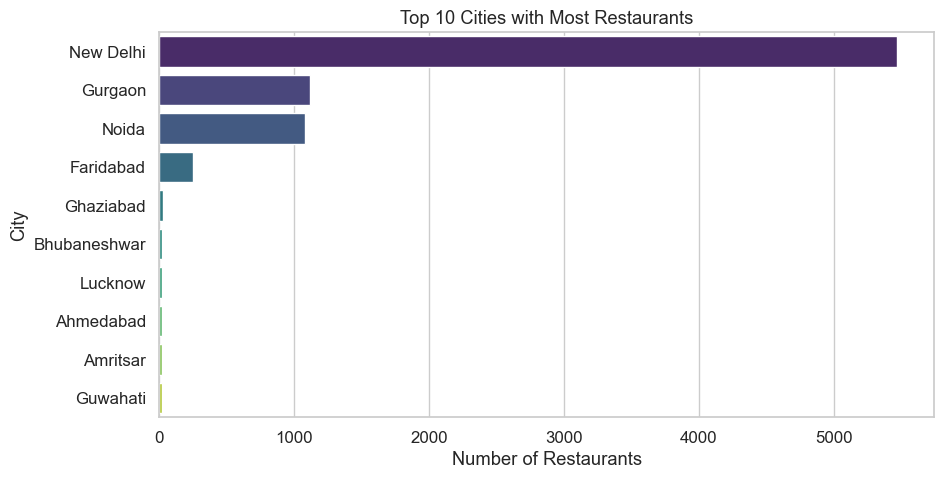

In [9]:
plt.figure(figsize=(10,5))
city_counts = df['City'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")

os.makedirs("outputs/charts", exist_ok=True)
plt.savefig("outputs/charts/top_cities_restaurants.png")
plt.show()


🌠 Step 6: Average Rating by City

C:\Users\Jiya\AppData\Local\Temp\ipykernel_9120\3146550547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='magma')


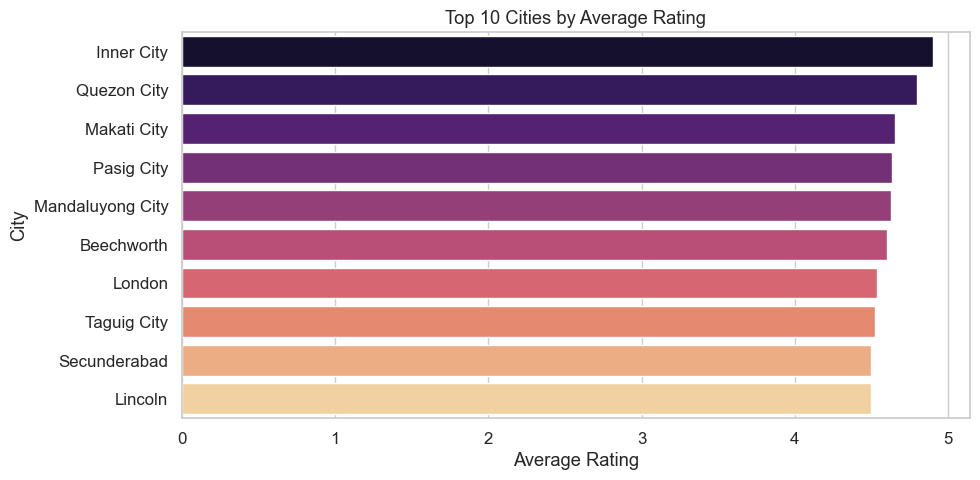

In [10]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='magma')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.tight_layout()

plt.savefig("outputs/charts/top_cities_by_rating.png")
plt.show()


🧾 Step 7: Insights

#### Observations:
- Cities with high restaurant counts may show geographic clustering (e.g., city center zones).
- Certain regions display higher ratings, indicating stronger service quality.
- Green clusters on the map represent areas with higher-rated restaurants.
- Densely populated restaurant zones might correspond to commercial districts or food hubs.


🧠 Step 8: Conclusion

The geographic analysis provided key insights into restaurant distribution patterns and rating density.  
Areas with higher restaurant concentration also showed greater rating variability.  
This information can guide business expansion and local marketing decisions.
